In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [7]:
weight, bias = 0.3, 0.9
input_data = torch.arange(start=0, end=1, step=0.01).unsqueeze(dim=1)
input_data.shape

torch.Size([100, 1])

In [8]:
output = weight * input_data + bias
output.shape

torch.Size([100, 1])

In [26]:
train_size = int(0.8 * len(input_data))
X_train, y_train = input_data[:train_size], output[:train_size]
X_test, y_test = input_data[train_size:], output[train_size:]
# visualizing
def plot_predictions(train_inputs, train_labels, test_inputs, test_labels, predictions=None):
    plt.figure(figsize=(7, 7))
    plt.scatter(train_inputs, train_labels, c='b', s=2, label='train data')
    plt.scatter(test_inputs, test_labels, c='r', s=2, label='test data')
    if predictions is not None:
        plt.scatter(test_inputs, predictions, c='g', s=2, label='predictions')
    plt.legend(prop={'size':14})

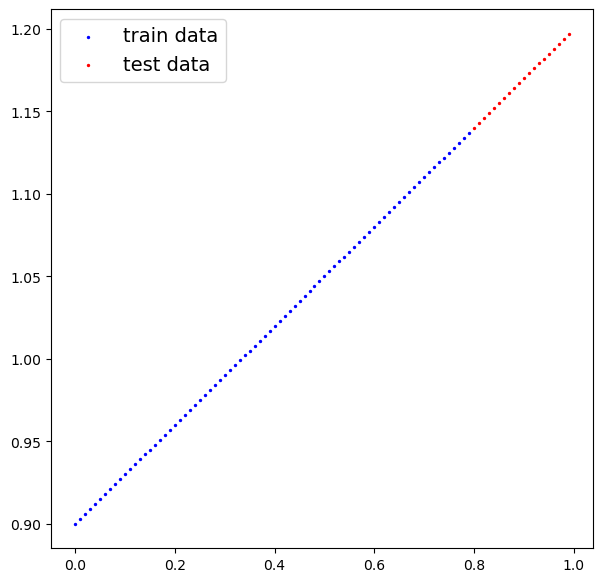

In [27]:
plot_predictions(X_train, y_train, X_test, y_test)

In [30]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [92]:
model = LinearRegression()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.4463]])),
             ('linear_layer.bias', tensor([-0.1381]))])

In [93]:
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [100]:
number_of_epochs = 300

for epoch in range(number_of_epochs):
    model.train()
    y_predictions = model(X_train)
    loss = loss_function(y_predictions, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # testing phase
    model.eval()
    with torch.inference_mode():
        test_predictions = model(X_test)
        test_loss = loss_function(test_predictions, y_test)
    if epoch % 20 == 0:
        print(f'Epoch: {epoch} | train loss: {loss} | test loss: {test_loss}')

Epoch: 0 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 20 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 40 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 60 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 80 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 100 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 120 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 140 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 160 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 180 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 200 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 220 | train loss: 0.008306843228638172 | test loss: 0.006915760226547718
Epoch: 240 | train loss: 0.008306843228638172 

In [101]:
with torch.inference_mode():
    test_predictions = model(X_test)
test_predictions.device

device(type='cpu')

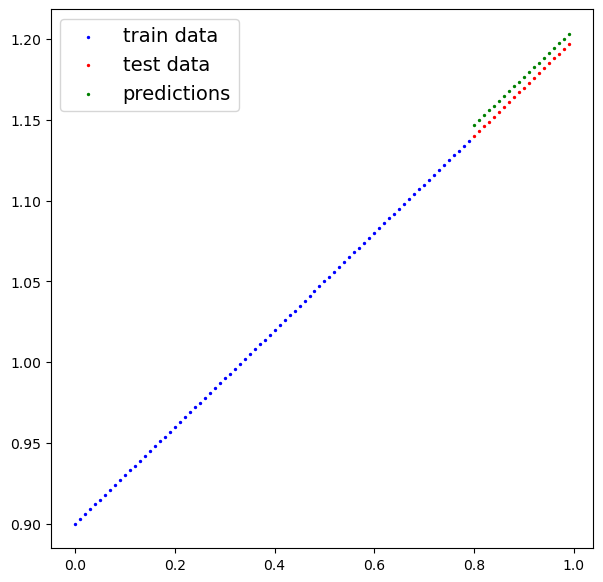

In [102]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=test_predictions)

In [103]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = 'simple_linear_regression.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

In [104]:
another_model = LinearRegression()
another_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
another_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2966]])),
             ('linear_layer.bias', tensor([0.9096]))])

In [105]:
another_model.eval()
with torch.inference_mode():
    result = another_model(X_test)
test_predictions == result

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])